## ***Any Issues w/ notebook kernel should be solved by running code in .py***


# Task A: Find GBDX Images 
### Complie and count catalog_id for all images

---


### Search Function for Image Queries

In [1]:
# Polygons
example = "POLYGON((-113.88427734375 40.36642741921034,-110.28076171875 40.36642741921034,-110.28076171875 37.565262680889965,-113.88427734375 37.565262680889965,-113.88427734375 40.36642741921034))"

area1 = "POLYGON((77.729 43.153, -77.769 43.156, -77.771 43.170, -77.729 43.161))"

area2 = "POLYGON((077.74978 43.145109, 077.734294 43.170047, 077.740252 43.141930, 077.718464 43.165739))"
#+43.145109-077.749782 +43.170047-077.734294 +43.141930-077.740252 +43.165739-077.718464

area3 = "POLYGON((-77.6152 43.1759, -77.5520 43.2192))"
#+43.159960-077.748849 +43.146704-077.736074 +43.153797-077.756024 +43.135942-077.743926

area4 = "POLYGON((-77.6152 43.1759, -77.5520 43.2192))"
#+43.157059-077.768668 +43.152888-077.728774 +43.144476-077.767779 +43.145120-077.728807

area5 = "POLYGON((-77.6152 43.1759, -77.5520 43.2192))"
#+43.169529-077.733744 +43.144840-077.749492 +43.174541-077.748782 +43.147754-077.759059

area6 = "POLYGON((-77.6152 43.1759, -77.5520 43.2192))"
#+43.146395-077.736542 +43.159828-077.749197 +43.154474-077.730009 +43.165062-077.743310

### Blanket Search over an area.

In [2]:
from gbdxtools import Interface
gbdx = Interface()

wkt_string = example
total_images = gbdx.catalog.search(searchAreaWkt=wkt_string)

In [3]:
print("Total of ", len(total_images), "images in this area.")

# saves all catalog_ids into a list
catalog_ids = [r['identifier'] for r in total_images]

Total of  1000 images in this area.


### Whats inside each image description:

In [4]:
# can return satelite name, time, vendor, cloud cover, etc...
from pprint import pprint
pprint(total_images[50])

{'identifier': 'LC80380342019129LGN00',
 'properties': {'browseURL': 'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/038/034/LC08_L1TP_038034_20190509_20190521_01_T1/LC08_L1TP_038034_20190509_20190521_01_T1_thumb_large.jpg',
                'bucketName': 'landsat-pds',
                'bucketPrefix': 'c1/L8/038/034/LC08_L1TP_038034_20190509_20190521_01_T1',
                'catalogID': 'LC80380342019129LGN00',
                'cloudCover': 62,
                'footprintWkt': 'POLYGON((-113.714 38.426, -114.169 36.825, '
                                '-112.045 36.516, -111.546 38.111, -113.714 '
                                '38.426))',
                'multiResolution': 30.0,
                'panResolution': 15.0,
                'path': 38,
                'platformName': 'LANDSAT08',
                'productID': 'LC08_L1TP_038034_20190509_20190521_01_T1',
                'row': 34,
                'sensorPlatformName': 'LANDSAT08',
                'timestamp': '2019-05-09T1

### How to search w/ different times of the year.

'timestamp': '2019-03-13T18:14:46.800Z',

'yyyy-mm-ddT18:hh:mm:sssZ'


In [5]:
# Standalone example
year = '2018'
date= '06-20'
d2= '06-22'

results = gbdx.catalog.search(searchAreaWkt=area1,
                  startDate="{y}-{d}T00:00:00.000Z".format(y=year, d=date),
                  endDate="{y}-{d}T00:00:00.000Z".format(y=year, d=d2))

len(results)

25

### Performs 4 searches for each season change from 2004 - 2019.

In [6]:
# Solstices and equinoxes
equinox_solstice = [ ['03-20','03-21'], ['06-20','06-22'],['09-22', '09-23'], ['12-21', '12-22']]
years = list(range(2004, 2020))

# Finds results for each 4 times of the year from 2004 to 2019
years_dictionary={}
for year in years:
    temp=[]
    for date in equinox_solstice:
        results = gbdx.catalog.search(searchAreaWkt=area1,
                          startDate="{y}-{d}T00:00:00.000Z".format(y=year, d=date[0]),
                          endDate="{y}-{d}T00:00:00.000Z".format(y=year, d=date[1]))
        temp.append(results)
    # add to dict
    years_dictionary[year] = temp

In [7]:
print("Number of images for 2019, Vernal Equinox: ", len(years_dictionary[2019][0]))

Number of images for 2019, Vernal Equinox:  11


### Saves Data

In [8]:
import json

json = json.dumps(years_dictionary)
f = open("years_dictionary.json","w")
f.write(json)
f.close()

In [9]:
import pickle

f = open("years_dictionary.pkl","wb")
pickle.dump(years_dictionary,f)
f.close()

### Example Image Pull

In [2]:
from gbdxtools import CatalogImage

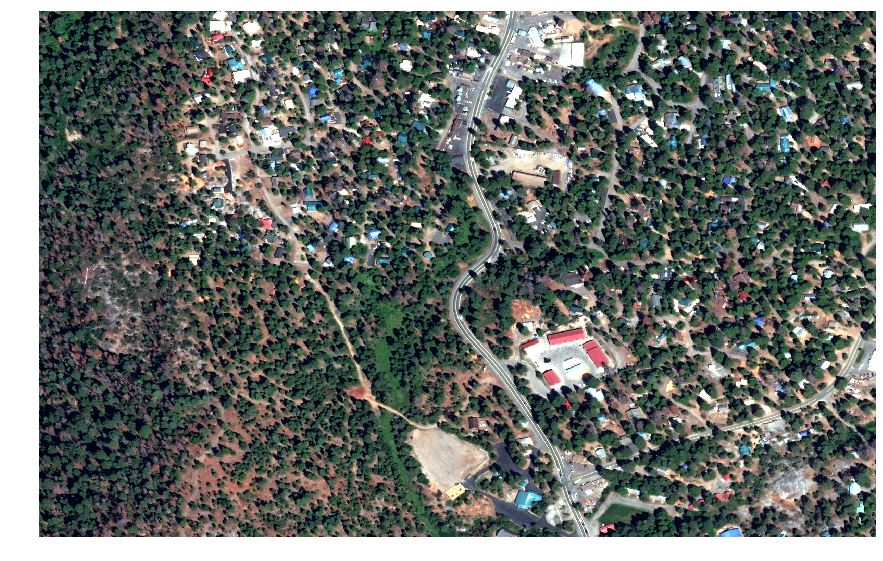

In [3]:
# Shaver Lake, CA
catalog_id = '103001006E28F900'
bbox = (-119.325, 37.10079727722707, -119.3144843598566, 37.107403037321205)

# Access the image as a CatalogImage
image = CatalogImage(catalog_id, band_type="MS", pansharpen=True, bbox=bbox)

# Plot it
image.plot(w=15, h=15)

---
# Task B: Slippy Map for Images
### Corvus Eye coordiantes

-77.729, 43.153,   -77.769, 43.156     -77.771, 43.170    -77.729, 43.161

---


In [5]:
!pip install --upgrade awscli -qq
!pip install PyHamcrest -qq
!pip install cython -qq
!pip install sklearn -qq
!pip install folium -qq
!pip install tqdm -qq
!pip install git+https://github.com/GeoBigData/nbfirerisk.git -qq 

boto3 1.9.80 has requirement s3transfer<0.2.0,>=0.1.10, but you'll have s3transfer 0.2.1 which is incompatible.
awscli 1.16.173 has requirement s3transfer<0.3.0,>=0.2.0, but you'll have s3transfer 0.1.13 which is incompatible.


In [6]:
from gbdxtools import CatalogImage
import gbdxtools
gbdx = gbdxtools.Interface()
import gbdxtools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm
import time
from functools import partial
from shapely.geometry import box, shape
from skimage import segmentation, filters
import nbfirerisk

### Example Run

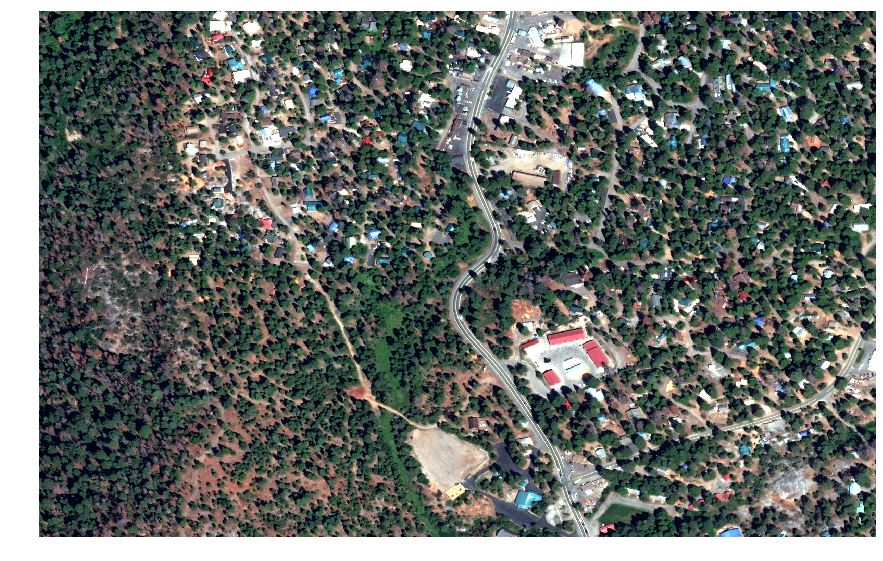

In [7]:
# Shaver Lake, CA
catalog_id = '103001006E28F900'
bbox = (-119.325, 37.10079727722707, -119.3144843598566, 37.107403037321205)

# Access the image as a CatalogImage
image = CatalogImage(catalog_id, band_type="MS", pansharpen=True, bbox=bbox)

# Plot it
image.plot(w=15, h=15)


In [8]:

# get footprints
shaver_lake_bldgs = nbfirerisk.ecopia_buildings_shaver_lake
geoms, buildings = nbfirerisk.from_geojson(shaver_lake_bldgs)
print(" There are {} Ecopia Building Footprints in this image.".format(len(buildings)))

# set the center location for the map
map_center = list(box(*bbox).centroid.coords)[0]
map_center_folium = [map_center[1], map_center[0]]  


# get the url for the imagery TMS
tms_url = nbfirerisk.TMS_103001006E28F900

# create the map
nbfirerisk.folium_map(nbfirerisk.to_geojson(buildings), 'Ecopia Building Footprints', location=map_center_folium, 
                       tiles=tms_url, attr='DigitalGlobe', zoom_start=16, map_zoom=16, height='100%', 
                       style_function=nbfirerisk.footprints_outline_styler,
                       tms=True, zoom_beyond_max=18, max_zoom=19)


              

 There are 263 Ecopia Building Footprints in this image.


In [27]:
#slippy map uses image for tms_url

print(nbfirerisk.TMS_103001006E28F900)

https://s3.amazonaws.com/notebooks-small-tms/103001006E28F900/{z}/{x}/{y}.png


### Irondequoit Data

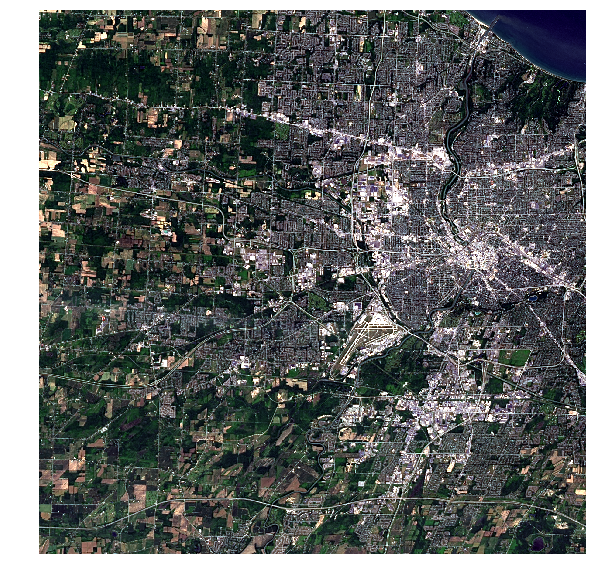

In [17]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', 'LC80160302018180LGN00')
bbox = env.inputs.get('bbox', '-77.86629796028139, 43.02535506333161, -77.5446903705597, 43.2598388108569')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")), pansharpen=True)
image.plot(w=10, h=10)

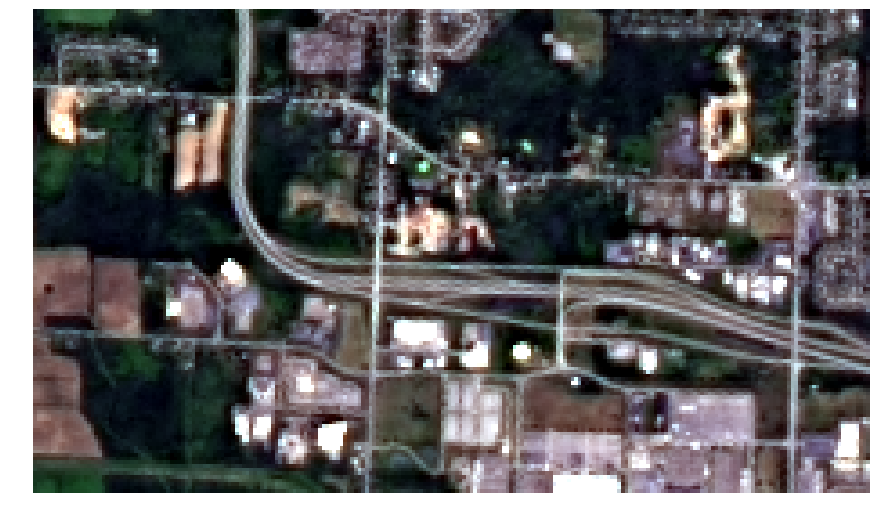

In [9]:
catalog_id = 'LC80160302018180LGN00'
bbox = (-77.729, 43.153, -77.771, 43.170)

# Access the image as a CatalogImage
image = CatalogImage(catalog_id, band_type="MS", pansharpen=True, bbox=bbox)

# Plot it
image.plot(w=15, h=15)

# Turn off "Fetching Image..." statements
image._read = partial(image._read, quiet=True)

In [10]:
# get footprints
shaver_lake_bldgs = nbfirerisk.ecopia_buildings_shaver_lake
geoms, buildings = nbfirerisk.from_geojson(shaver_lake_bldgs)
print(" There are {} Ecopia Building Footprints in this image.".format(len(buildings)))

buildings=[]

# set the center location for the map
map_center = list(box(*bbox).centroid.coords)[0]
map_center_folium = [map_center[1], map_center[0]]  


# get the url for the imagery TMS
#tms_url = nbfirerisk.TMS_103001006E28F900

# try formating picture into tms?
tms_url = 'images/test.png'

# create the map
nbfirerisk.folium_map(nbfirerisk.to_geojson(buildings), 'Ecopia Building Footprints', location=map_center_folium, 
                       tiles=tms_url, attr='DigitalGlobe', zoom_start=15, map_zoom=15, height='100%', 
                       style_function=nbfirerisk.footprints_outline_styler,
                       tms=True, zoom_beyond_max=18, max_zoom=19)


              

 There are 263 Ecopia Building Footprints in this image.


# Task C: GBDX OSM Vector Data

### For Irondequoit, the lat and lon range is : 
43.1759   43.2192  -77.6152  -77.5520

'-77.6152, 43.1759, -77.5520, 43.2192'
___

## Code below displays GBDX integrated OSM data onto a Slippy Map
#### Using GBDX built in vectors for OSM data
#### OSM data likely not completely up to date: last updated May 2018

In [1]:
# Install dependencies
!pip install -qq folium==0.7.0
!pip install -qq python-geohash
!pip install -qq geojson
!pip install -qq panda

import time
import json
import folium
import geohash
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

from decimal import Decimal
from shapely.geometry import box
from shapely.geometry import shape
from geojson import Polygon, Feature, FeatureCollection
from gbdxtools import Interface

gbdx = Interface()

In [2]:
# define the area of interest
#bbox = [12.557158470153809,55.67826194312847,12.57406711578369,55.686972023983884]
bbox = [-77.6152, 43.1759, -77.5520, 43.2192]
aoi = box(*bbox)

In [3]:
start_time = time.time()
query = gbdx.vectors.query(aoi.wkt, query='ingest_source:OSM AND geom_type:Polygon AND item_type:Building',
                              index='vector-osm-*', count=500)
print('Runtime: ', round(Decimal(time.time() - start_time), 4),'s')

# build geojson feature collection
data = {
    'type': 'FeatureCollection',
    'features': query
}

m = folium.Map(
    location=[43.19, -77.57],
    zoom_start=13
)

fg = folium.FeatureGroup(name='Openstreetmap')

# add features to folium feature group
for feature in data['features']:
    feat = folium.GeoJson(feature['geometry'])
    feat.add_child(folium.Popup('NAME: ' + str(feature['properties']['name'])))
    fg.add_child(feat)
    
m.add_child(fg)

m

Runtime:  0.5400 s


In [4]:
bbox = [-77.6152, 43.1759, -77.5520, 43.2192]
   
# convert the bounding box into a well-known text format
bbox_wkt = box(*bbox).wkt

# (results come back formatted as geojson)
roads_geojson = gbdx.vectors.query(bbox_wkt, query="ingest_source:OSM AND item_type:Road", index="vector-osm-*", count=500)

# how many are there?
print('Number of road features:', len(roads_geojson))



Number of road features: 500


In [5]:
# view them on a map
gbdx.vectors.map(roads_geojson, zoom=13)

<IPython.core.display.Javascript object>

# TASK D
## Third Party Sources
___

### GBDX / Ecopia Feature: Generate building footprint ShapeFile for a given location? 

### GBDX Footprint Generator Quote:

"For the building footprints quote we collected approximately 91,000 footprints in the general area of Rochester. Once we have a more specific shapefile we can be sure to make sure that is a more exact figure.

 
The cost for this (again, once we have a more specific polygon/shapefile we can give a more exact cost) is going to be around $11,755.30."

- GBDX building footprint generator for 
- Other products using GBDX include city planning to enhance 5G cellular networks and building elevation models
- These products exculding building footprints only have samples and seem to be in beta.
- No prices or detailed product data


#### Screenshot of sample building footprint shapefile viewed on mapshaper. Location: San Francisco.
![SF](images/SFfootprint.png)

### Other Vector Data:
- GBDX includes Vector data from multiple sources including:
- OSM
- Twitter
- Gazzetter (news)
- Armed Conflict Location & Event Data Project (ACLED)




## References
---

- https://notebooks.geobigdata.io/hub/notebooks/5c0032c083762c1be41fade4?tab=code
- https://notebooks.geobigdata.io/hub/notebooks/oxfdntjzKz_viyjzAzSa?tab=code
